In [1]:
%reset -f

In [2]:
from linearmodels.panel           import PooledOLS, RandomEffects, compare
from linearmodels                 import PanelOLS
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools  import durbin_watson
from scipy                        import stats

import numpy.linalg      as la
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import statsmodels.api   as sm

In [3]:
data = pd.read_csv("airfare.csv")

In [4]:
data.columns

Index(['year', 'id', 'dist', 'passen', 'fare', 'bmktshr', 'ldist', 'y98',
       'y99', 'y00', 'lfare', 'ldistsq', 'concen', 'lpassen'],
      dtype='object')

In [5]:
data.year

0       1997
1       1998
2       1999
3       2000
4       1997
        ... 
4591    2000
4592    1997
4593    1998
4594    1999
4595    2000
Name: year, Length: 4596, dtype: int64

In [6]:
data['year'].dtypes

dtype('int64')

In [7]:
data['id'].dtypes

dtype('int64')

# transform them into index (categorical variables)

In [8]:
year = pd.Categorical(data.year)
id   = pd.Categorical(data.id)

# set panel id as "id" and "year" befpre checking the table

In [9]:
data = data.set_index(['id', 'year'])

In [10]:
data['year'] = year
data['id']   = id

In [11]:
data['year'].dtypes

CategoricalDtype(categories=[1997, 1998, 1999, 2000], ordered=False)

In [12]:
data['id'].dtypes

CategoricalDtype(categories=[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
                  ...
                  1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149],
, ordered=False)

# Now we can check the table

In [13]:
data.describe

<bound method NDFrame.describe of            dist  passen  fare  bmktshr     ldist  y98  y99  y00     lfare  \
id   year                                                                   
1    1997   528     152   106   0.8386  6.269096    0    0    0  4.663439   
     1998   528     265   106   0.8133  6.269096    1    0    0  4.663439   
     1999   528     336   113   0.8262  6.269096    0    1    0  4.727388   
     2000   528     298   123   0.8612  6.269096    0    0    1  4.812184   
2    1997   861     282   104   0.5798  6.758094    0    0    0  4.644391   
...         ...     ...   ...      ...       ...  ...  ...  ...       ...   
1148 2000  1948     198   311   0.4272  7.574558    0    0    1  5.739793   
1149 1997   857     493   147   0.7089  6.753438    0    0    0  4.990433   
     1998   857     523   142   0.7797  6.753438    1    0    0  4.955827   
     1999   857     441   146   0.7465  6.753438    0    1    0  4.983607   
     2000   857     556   145   0.8122  6.

In [14]:
data.head()

dist  passen  fare  bmktshr     ldist  y98  y99  y00     lfare  \
id year                                                                   
1  1997   528     152   106   0.8386  6.269096    0    0    0  4.663439   
   1998   528     265   106   0.8133  6.269096    1    0    0  4.663439   
   1999   528     336   113   0.8262  6.269096    0    1    0  4.727388   
   2000   528     298   123   0.8612  6.269096    0    0    1  4.812184   
2  1997   861     282   104   0.5798  6.758094    0    0    0  4.644391   

           ldistsq  concen   lpassen  year id  
id year                                        
1  1997  39.301571  0.8386  5.023880  1997  1  
   1998  39.301571  0.8133  5.579730  1998  1  
   1999  39.301571  0.8262  5.817111  1999  1  
   2000  39.301571  0.8612  5.697094  2000  1  
2  1997  45.671837  0.5798  5.641907  1997  2

In [15]:
data.tail()

dist  passen  fare  bmktshr     ldist  y98  y99  y00     lfare  \
id   year                                                                   
1148 2000  1948     198   311   0.4272  7.574558    0    0    1  5.739793   
1149 1997   857     493   147   0.7089  6.753438    0    0    0  4.990433   
     1998   857     523   142   0.7797  6.753438    1    0    0  4.955827   
     1999   857     441   146   0.7465  6.753438    0    1    0  4.983607   
     2000   857     556   145   0.8122  6.753438    0    0    1  4.976734   

             ldistsq  concen   lpassen  year    id  
id   year                                           
1148 2000  57.373932  0.4272  5.288267  2000  1148  
1149 1997  45.608925  0.7089  6.200509  1997  1149  
     1998  45.608925  0.7797  6.259582  1998  1149  
     1999  45.608925  0.7465  6.089045  1999  1149  
     2000  45.608925  0.8122  6.320768  2000  1149

# this is extremely important in database management (we can extract subtable exactly based on the panel id now)

---

# Now, let's do Pooled OLS

In [16]:
exog_vars = ['y98','y99','y00','concen','ldist', 'ldistsq']
exog = sm.add_constant(data[exog_vars])
mod_ols = PooledOLS(data.lfare, exog)
pooled_res = mod_ols.fit()
print(pooled_res)    

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lfare   R-squared:                        0.4062
Estimator:                  PooledOLS   R-squared (Between):              0.4215
No. Observations:                4596   R-squared (Within):               0.1246
Date:                Thu, Oct 07 2021   R-squared (Overall):              0.4062
Time:                        07:42:17   Log-likelihood                   -1512.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      523.18
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(6,4589)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             523.18
                            

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# now let's run OLS with robust se

In [17]:
mod_ols_robust = PooledOLS(data.lfare, exog)
pooled_robust_res = mod_ols_robust.fit(cov_type='robust')
print(pooled_robust_res)    

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lfare   R-squared:                        0.4062
Estimator:                  PooledOLS   R-squared (Between):              0.4215
No. Observations:                4596   R-squared (Within):               0.1246
Date:                Thu, Oct 07 2021   R-squared (Overall):              0.4062
Time:                        07:43:57   Log-likelihood                   -1512.3
Cov. Estimator:                Robust                                           
                                        F-statistic:                      523.18
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(6,4589)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             558.39
                            

# now let's compare two results

In [20]:
print(compare({"unadjusted se": pooled_res, "robust se": pooled_robust_res}))

                Model Comparison               
                      unadjusted se   robust se
-----------------------------------------------
Dep. Variable                 lfare       lfare
Estimator                 PooledOLS   PooledOLS
No. Observations               4596        4596
Cov. Est.                Unadjusted      Robust
R-squared                    0.4062      0.4062
R-Squared (Within)           0.1246      0.1246
R-Squared (Between)          0.4215      0.4215
R-Squared (Overall)          0.4062      0.4062
F-statistic                  523.18      523.18
P-value (F-stat)             0.0000      0.0000
=====================  ============ ===========
const                        6.2093      6.2093
                           (14.762)    (13.179)
y98                          0.0211      0.0211
                           (1.5044)    (1.4904)
y99                          0.0378      0.0378
                           (2.6956)    (2.6282)
y00                          0.0999     

# it seems that the se does not change too much, we need to check whether we truly need robust standard error (or it is just waste of degrees of freedom)

# check homoskedasticity : residuals-Plot for growing variance Detection

* you can find that, as the predicted value increases, residual bandwidth changes
* hence, you need to use robust se

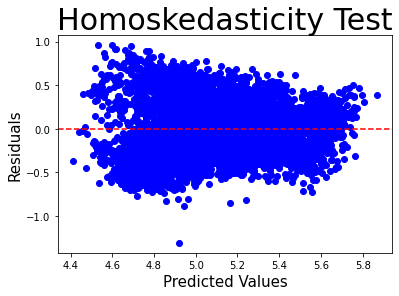

In [17]:
fittedvals_pooled_OLS = pooled_res.predict().fitted_values
residuals_pooled_OLS  = pooled_res.resids

fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

## White-Test

In [18]:
pooled_OLS_dataset = pd.concat([data, residuals_pooled_OLS], axis=1)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

{'LM-Stat': 983.7535917318074, 'LM p-val': 8.079279422055675e-195, 'F-Stat': 59.31790834383884, 'F p-val': 1.9424740348367944e-220}


## Breusch-Pagan-Test

In [19]:
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 873.0391972575623, 'LM p-val': 2.5287993424272127e-185, 'F-Stat': 179.35442105038828, 'F p-val': 1.1283892993106912e-205}


## In simple terms, if p < 0.05, then heteroskedasticity is indicated. Both tests give very small p-values. Hence, we have heteroskedasticity

# now check autocorrelation
## Durbin-Watson-Test

In [20]:
durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.5012862296798662


## The Durbin-Watson-Test will have one output between $0$ and $4$. The mean $(= 2)$ would indicate that there is no autocorrelation identified, $0$ to $2$ means positive autocorrelation (the nearer to zero the higher the correlation), and $2$ to $4$ means negative autocorrelation (the nearer to four the higher the correlation). In our example, the result is $0.5$, which clearly indicates strong positive autocorrelation.

# hence, we need robust se, even though it does not bring too much change

---

# Random effect

In [23]:
mod_re = RandomEffects(data.lfare, exog)
re_res = mod_re.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lfare   R-squared:                        0.2285
Estimator:              RandomEffects   R-squared (Between):              0.4175
No. Observations:                4596   R-squared (Within):               0.1348
Date:                Thu, Oct 07 2021   R-squared (Overall):              0.4029
Time:                        07:59:36   Log-likelihood                    3771.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      226.57
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(6,4589)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             226.57
                            

In [24]:
re_res_rb = mod_re.fit(cov_type='robust')
print(re_res_rb)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lfare   R-squared:                        0.2285
Estimator:              RandomEffects   R-squared (Between):              0.4175
No. Observations:                4596   R-squared (Within):               0.1348
Date:                Thu, Oct 07 2021   R-squared (Overall):              0.4029
Time:                        07:59:39   Log-likelihood                    3771.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      226.57
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(6,4589)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             210.08
                            

# now, we can decompose the total variance of Y into 2 parts

* the variance of Y explained by the effects
* the variance of Y that cannot be expalined

In [25]:
print("the total variance of Y is ", np.var(data.lfare))

the total variance of Y is  0.19040347706674826


In [26]:
re_res.variance_decomposition

Effects                   0.102251
Residual                  0.011351
Percent due to Effects    0.900078
Name: Variance Decomposition, dtype: float64

## The coefficient $\theta_i$ determines how much demeaning takes place. When this value is 1, the RE model reduces to the pooled model since this occurs when there is no variance in the effects. When panels are unbalanced it will vary across entities, but in this balanced panel all values are the same.

In [27]:
re_res.theta.head()

,theta
id,
1,0.83567
2,0.83567
3,0.83567
4,0.83567
5,0.83567


# Now, let's do fixed effect

In [28]:
exog_vars = ['y98','y99','y00','concen']
exog = sm.add_constant(data[exog_vars])
mod_fe = PanelOLS(data.lfare, exog, entity_effects=True)
fe_res = mod_fe.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lfare   R-squared:                        0.1352
Estimator:                   PanelOLS   R-squared (Between):             -0.0417
No. Observations:                4596   R-squared (Within):               0.1352
Date:                Thu, Oct 07 2021   R-squared (Overall):             -0.0325
Time:                        07:59:53   Log-likelihood                    4435.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      134.61
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(4,3443)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             134.61
                            

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
fe_res_rb = mod_fe.fit(cov_type='robust')
print(fe_res_rb)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lfare   R-squared:                        0.1352
Estimator:                   PanelOLS   R-squared (Between):             -0.0417
No. Observations:                4596   R-squared (Within):               0.1352
Date:                Thu, Oct 07 2021   R-squared (Overall):             -0.0325
Time:                        08:00:19   Log-likelihood                    4435.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                      134.61
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(4,3443)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             120.79
                            

In [31]:
print(compare({"FE": fe_res, "FE_rb": fe_res_rb, "RE": re_res, "RE_rb": re_res_rb, "Pooled": pooled_res, "Pooled_rb": pooled_robust_res}))

                                                  Model Comparison                                                  
                                    FE        FE_rb                RE             RE_rb         Pooled     Pooled_rb
--------------------------------------------------------------------------------------------------------------------
Dep. Variable                    lfare        lfare             lfare             lfare          lfare         lfare
Estimator                     PanelOLS     PanelOLS     RandomEffects     RandomEffects      PooledOLS     PooledOLS
No. Observations                  4596         4596              4596              4596           4596          4596
Cov. Est.                   Unadjusted       Robust        Unadjusted            Robust     Unadjusted        Robust
R-squared                       0.1352       0.1352            0.2285            0.2285         0.4062        0.4062
R-Squared (Within)              0.1352       0.1352            0

# Hausman test : there is no Hausman test in Python, so I coded it myself.

In [32]:
b = fe_res.params[1:]
print(b)
B = re_res.params[1:5]
print(B)

y98       0.022833
y99       0.036382
y00       0.097772
concen    0.168859
Name: parameter, dtype: float64
y98       0.022475
y99       0.036689
y00       0.098211
concen    0.208927
Name: parameter, dtype: float64


In [33]:
v_b = fe_res.cov.drop('const', axis=1)
v_b = v_b[1:]
print(v_b)
v_B = re_res.cov.drop(['const','ldist','ldistsq'], axis=1)
v_B = v_B[1:5]
print(v_B)

             y98       y99       y00    concen
y98     0.000020  0.000010  0.000010 -0.000008
y99     0.000010  0.000020  0.000010  0.000007
y00     0.000010  0.000010  0.000020  0.000009
concen -0.000008  0.000007  0.000009  0.000865
             y98       y99       y00    concen
y98     0.000020  0.000010  0.000010 -0.000006
y99     0.000010  0.000020  0.000010  0.000005
y00     0.000010  0.000010  0.000020  0.000008
concen -0.000006  0.000005  0.000008  0.000704


In [34]:
df = b[np.abs(b) < 1e8].size
chi2 = np.dot((b-B).T, la.inv(v_b - v_B).dot(b - B)) 
pval = stats.chi2.sf(chi2, df)


dict = {'chi-sq stat' : [chi2],
        'df' : [df],
        'p-value' : [pval]}
Hausman_df = pd.DataFrame(dict)

In [35]:
Hausman_df.round(2)

,chi-sq stat,df,p-value
0,9.96,4,0.04


In [36]:
!rm -rf W7_Python.html
!jupyter nbconvert --to html W7_Python.ipynb

[NbConvertApp] Converting notebook W7_Python.ipynb to html
[NbConvertApp] Writing 666532 bytes to W7_Python.html
